<h1>Studienarbeit: Predictive Analytics</h1>
<b>Personen:</b> Luise Fabich / Vinh-Phnong Nguyen / Marc Willberg

<h2>Vorhersage des Trinkgelds der gelben Taxis in New York anhand von verschiedenen Faktoren:</h2>
Ziel ist es, ein Modell zu entwickeln, das die zu erwartenden Trinkgelder auf der Grundlage verschiedener Faktoren wie Fahrtdauer, Tageszeit und Zielort vorhersagt. Die Datenbasis bildet hierbei die Taxifahrten der gelben Taxis in New York aus dem Jahr 2023.

<h1>Laden der Datensätze:</h1>
<p>Die zu analysierenden Daten sind unter der folgenden Webseite zu finden:</p>
<p>Page: <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">TLC Trip Record Data</a></p>

In [1]:
import os

year = 2023

# Laden des Verzeichnisses
path = f'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY'
year_directory = os.path.join(path, f'{year}')

# Ausgabe aller gefundenen .parquet-Dateien
print("Folgende Daten wurden gefunden:")
parquet_files = [os.path.join(year_directory, file) for file in os.listdir(year_directory) if file.endswith('.parquet')]
for file in parquet_files:
    print(file)

Folgende Daten wurden gefunden:
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-01.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-02.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-03.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-04.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-05.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-06.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-07.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-08.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_T


<h2>Einsicht auf Rohdaten:</h2>
<p>Für einen Einblick der Rohdaten werden aus der ersten Datei die ersten 5 Spalten geladen.</p>
<p>Erklärung der Datensätze: <a href="https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf" target="_blank">Data Dictionary – Yellow Taxi Trip Records</a></p>



In [2]:
from IPython.display import display
import pandas as pd

# Laden der ersten .parquet-Datei
first_file = parquet_files[0]
df = pd.read_parquet(first_file)

# Anzeige der ersten 7 Spalten
df_head = df.iloc[:5, :].T
display(df_head)

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


<h2>Größe der Datensätze:</h2>
Um einen ersten Überblick über die relevanten Größen zu erhalten, werden die Datengrößen zunächst analysiert. Um einen groben Eindruck zu erhalten wird hierfür der <b>Mai des Jahres 2023</b> betrachtet.
Es wird erkenntlich das pro Monat ca. 3 Millionen Fahrten gemacht werden. Dies entspricht ca. 100.000 Fahrten pro Tag.

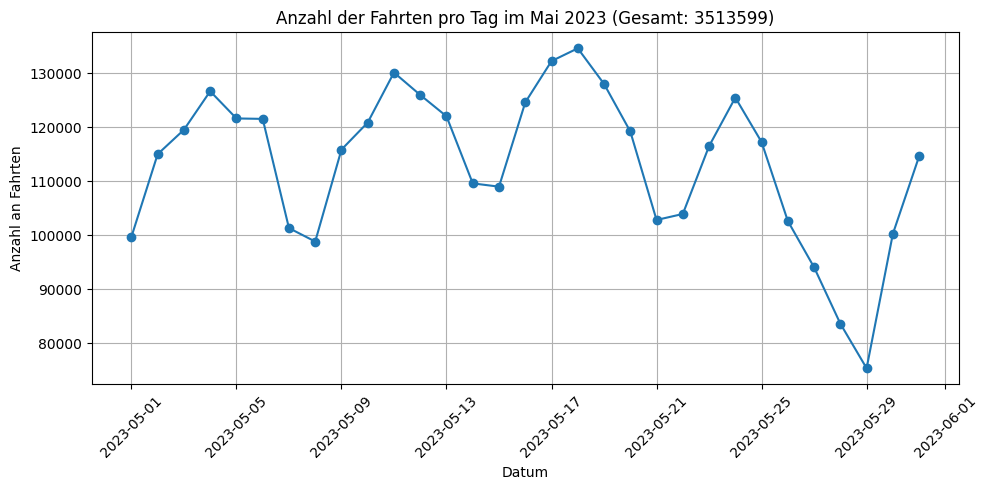

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, date
import calendar

def counts_day_trips_for_month(data, year, month):
    start_date = date(year, month, 1)
    end_date = date(year, month, calendar.monthrange(year, month)[1])

    # Konvertierung der Datumsspalte
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.date

    # Initialisierung der Liste für die Ergebnisse
    count_list = []

    # Durchlauf der Daten und Aufteilung in Tagen
    for current_date in pd.date_range(start_date, end_date):
        count = (data['tpep_pickup_datetime'] == current_date.date()).sum()
        count_list.append((current_date.date(), count))

    return count_list

# Auswahl Monat, Jahr, Pfad
month = 5
year = 2023
path = 'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY\\2023\\yellow_tripdata_2023-05.parquet'

# Daten laden des Monats
data = pd.read_parquet(path)

# Laden der Fahrten je Tage
list_day_trips = counts_day_trips_for_month(data, year, month)

# Gesamtanzahl der Fahrten
total_trips = sum(item[1] for item in list_day_trips)

# Chart
x_data = [item[0] for item in list_day_trips]
y_data = [item[1] for item in list_day_trips]
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title(f'Anzahl der Fahrten pro Tag im Mai 2023 (Gesamt: {total_trips})')
plt.xlabel('Datum')
plt.ylabel('Anzahl an Fahrten')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Vorbereitung der Daten:</h2>
Zunächst werden die Daten vorbereitet um Algorithmen auf diesen anzuwenden.

In [4]:
class TaxiTripFeatures:
    def __init__(self, travel_time,start_month, start_day, start_hour, weekday, passenger_count, trip_distance, PULocationID, DOLocationID, tip_amount, total_amount_without_tip):
        self.travel_time = travel_time                           #Fahrtzeit in Sekunden
        self.start_day = start_day                               #Tag in dem das Taxi gestartet hat
        self.start_hour = start_hour                             #Stunde in dem das Taxi gestartet hat
        self.weekday = weekday                                   #Wochentag als int in dem das Taxi gestartet hat
        self.passenger_count = passenger_count                   #Anzahl der Passagiere
        self.trip_distance = trip_distance                       #Fahrtdistanz in Meilen 
        self.PULocationID = PULocationID                         #StartID Standort
        self.DOLocationID = DOLocationID                         #ZielID Standort
        self.tip_amount = tip_amount                             #Trinkgeld
        self.total_amount_without_tip = total_amount_without_tip #Gesamtbetrag ohne Trinkgeld

    def __repr__(self):
        return (f"TaxiTripFeatures(travel_time={self.travel_time}, start_day={self.start_day}, "
                f"start_hour={self.start_hour}, weekday={self.weekday}, passenger_count={self.passenger_count}, "
                f"trip_distance={self.trip_distance}, PULocationID={self.PULocationID}, DOLocationID={self.DOLocationID}, "
                f"tip_amount={self.tip_amount}, total_amount_without_tip={self.total_amount_without_tip})")

<h2>Analyse der Datengröße:</h2>

<h3>Laden der gesamten Daten:</h3>
Um eine gute Stichprobe der Datensätze zu ermitteln werden zunächst alle Datensätze benötigt. Hierzu ist zu beachten das nur Datensätze geladen werden die nicht leer sind und wo mit Kreditkarte gezahlt wurde. Dies hat den Grund da bei Bahrzahlung das Trinkgeld nicht angegeben wurde.

In [5]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import random

def load_features_from_file(file_path):
    data = pd.read_parquet(file_path, engine='auto')
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    
    # Filter data to include only credit card payments and drop rows with any missing values
    data = data[data['payment_type'] == 1].dropna()

    # Drop rows with any missing values
    data = data.dropna()

    features = [
        TaxiTripFeatures(
            (row['tpep_dropoff_datetime'] - row['tpep_pickup_datetime']).total_seconds(),
            row['tpep_pickup_datetime'].month,
            row['tpep_pickup_datetime'].day,
            row['tpep_pickup_datetime'].hour,
            row['tpep_pickup_datetime'].weekday(),
            row['passenger_count'],
            row['trip_distance'],
            row['PULocationID'],
            row['DOLocationID'],
            row['tip_amount'],
            row['total_amount'] - row['tip_amount']
        ) for _, row in data.iterrows()
    ]
    
    return features

# Wähle eine zufällige Datei aus der Liste
random_file = random.choice(parquet_files)
print(f"Zufällig ausgewählte Datei: {random_file}")

# Lade alle Daten aus der zufällig ausgewählten Datei
start_time = time.time()
features_list = load_features_from_file(random_file)
end_time = time.time()

print(f"\nData loading complete! Total time taken: {end_time - start_time:.2f} seconds.")
print(f"Anzahl geladener Datensätze: {len(features_list)}")


Zufällig ausgewählte Datei: C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-08.parquet

Data loading complete! Total time taken: 190.14 seconds.
Anzahl geladener Datensätze: 2151468


<h3>Festlegung der Strichprobe mit KS-Test:</h3>
Für die nächsten Schritte wird aus dem Jahr 2023 ein Monatsdatensatz als Stichprobe verwendet. Dies ermöglicht es, effizient Muster und Trends zu analysieren, ohne das gesamte Jahr betrachten zu müssen. Ein einzelner Monat bietet ausreichend Daten, um eine gute Aussage im Vergleich zu anderen Monaten zu treffen. Als Stichprobe betrachten wir ca. 5% der Daten. Daher wird von jedem Tag eine Stichprobe von 5.000 Datensätzen verwendet. Dies sollte pro Monat eine Stichprobengröße von ca. 150.000 Datensätzen ergeben.

Es wird versucht, eine Stichprobe zu erstellen, die eine ähnliche Verteilung aufweist wie die gesamten Daten, um spätere Aussagen zu den Daten nicht zu verfälschen. Hierzu wird der <b>Kolmogorov-Smirnov-Tests (KS-Test)</b> verwendet.

Tage für die kein p-Wert > 0.1 bestimmt werden kann werden ausgeschieden, da es signifikanten Unterschied zwischen den Verteilungen gibt.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import time
import matplotlib.pyplot as plt

# Konvertieren Sie die Liste von TaxiTripFeatures-Objekten in einen DataFrame
data = pd.DataFrame([vars(feature) for feature in features_list])

# Funktionen zum Ziehen von Stichproben
def sample_data_per_day(data, sample_size_per_day=10000):
    sampled_data = data.groupby('start_day', group_keys=False).apply(
        lambda x: x.sample(n=sample_size_per_day, random_state=42) if len(x) > sample_size_per_day else x
    ).reset_index(drop=True)
    return sampled_data

# Kolmogorov-Smirnov-Test für alle Merkmale durchführen
def ks_test(data, sample):
    ks_results = {}
    for column in data.columns:
        if data[column].dtype in [np.float64, np.int64]:
            statistic, p_value = ks_2samp(data[column].dropna(), sample[column].dropna())
            ks_results[column] = {'KS-Statistik': statistic, 'p-Wert': p_value}
    return ks_results

# Funktion zur Überprüfung, ob die Stichprobe gut ist
def is_sample_good(ks_results, p_value_threshold=0.9):  # Schwellenwert auf 0.9 erhöht
    for result in ks_results.values():
        if result['p-Wert'] < p_value_threshold:
            return False
    return True

# Wiederholte Stichprobenziehung und Überprüfung
def repeated_sampling(data, max_iterations=100, sample_size_per_day=10000, p_value_threshold=0.9):
    for iteration in range(max_iterations):
        sampled_data = sample_data_per_day(data, sample_size_per_day)
        ks_results = ks_test(data, sampled_data)
        if is_sample_good(ks_results, p_value_threshold):
            print(f"Gute Stichprobe nach {iteration + 1} Iterationen gefunden.")
            return sampled_data, ks_results
        
        progress = (iteration + 1) / max_iterations * 100
        print(f"\rFortschritt: {progress:.2f}%", end='')

    print("\nKeine gute Stichprobe gefunden.")
    return None, None

# Visualisierung der Verteilung
def plot_distributions(data, sample, columns):
    for column in columns:
        if data[column].dtype in [np.float64, np.int64]:
            plt.figure(figsize=(12, 6))
            plt.hist(data[column], bins=50, alpha=0.5, label='Population')
            plt.hist(sample[column], bins=50, alpha=0.5, label='Sample')
            plt.title(f'Distribution of {column}')
            plt.legend(loc='upper right')
            plt.show()

# Ziehen der Stichprobe mit wiederholter Überprüfung
start_time = time.time()
sampled_data, ks_results = repeated_sampling(data)
end_time = time.time()

# Ausgabe der Zeit und Anzahl der Datensätze
if sampled_data is not None:
    print(f"\nData sampling complete! Total time taken: {end_time - start_time:.2f} seconds.")
    print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")
    print("\nKolmogorov-Smirnov-Test Ergebnisse:")
    for column, result in ks_results.items():
        print(f"{column}: KS-Statistik = {result['KS-Statistik']:.3f}, p-Wert = {result['p-Wert']:.3f}")

    # Beispielverteilung für ausgewählte Merkmale plotten
    plot_distributions(data, sampled_data, ['travel_time', 'passenger_count', 'trip_distance', 'tip_amount', 'total_amount_without_tip'])
else:
    print("Keine gute Stichprobe gefunden.")


C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 1.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 2.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 3.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 4.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 5.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 6.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 7.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 8.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 9.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 10.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 11.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 12.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 13.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 14.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 15.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 16.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 17.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 18.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 19.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 20.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 21.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 22.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 23.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 24.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 25.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 26.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\1030897953.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import time
import matplotlib.pyplot as plt

# Konvertieren Sie die Liste von TaxiTripFeatures-Objekten in einen DataFrame
data = pd.DataFrame([vars(feature) for feature in features_list])

# Funktionen zum Ziehen von Stichproben
def sample_data_per_day(data, sample_size_per_day=10000):
    sampled_data = data.groupby('start_day', group_keys=False).apply(
        lambda x: x.sample(n=sample_size_per_day, random_state=42) if len(x) > sample_size_per_day else x
    ).reset_index(drop=True)
    return sampled_data

# Kolmogorov-Smirnov-Test für alle Merkmale durchführen
def ks_test(data, sample):
    ks_results = {}
    for column in data.columns:
        if data[column].dtype in [np.float64, np.int64]:
            statistic, p_value = ks_2samp(data[column].dropna(), sample[column].dropna())
            ks_results[column] = {'KS-Statistik': statistic, 'p-Wert': p_value}
    return ks_results

# Funktion zur Überprüfung, ob die Stichprobe gut ist
def is_sample_good(ks_results, p_value_threshold=0.9):  # Schwellenwert auf 0.9 erhöht
    for result in ks_results.values():
        if result['p-Wert'] < p_value_threshold:
            return False
    return True

# Wiederholte Stichprobenziehung und Überprüfung
def repeated_sampling(data, max_iterations=100, sample_size_per_day=10000, p_value_threshold=0.9):
    for iteration in range(max_iterations):
        sampled_data = sample_data_per_day(data, sample_size_per_day)
        ks_results = ks_test(data, sampled_data)
        if is_sample_good(ks_results, p_value_threshold):
            print(f"Gute Stichprobe nach {iteration + 1} Iterationen gefunden.")
            return sampled_data, ks_results
        
        progress = (iteration + 1) / max_iterations * 100
        print(f"\rFortschritt: {progress:.2f}%", end='')

    print("\nKeine gute Stichprobe gefunden.")
    return None, None

# Ziehen der Stichprobe mit wiederholter Überprüfung
start_time = time.time()
sampled_data, ks_results = repeated_sampling(data)
end_time = time.time()

# Ausgabe der Zeit und Anzahl der Datensätze
if sampled_data is not None:
    print(f"\nData sampling complete! Total time taken: {end_time - start_time:.2f} seconds.")
    print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")
    print("\nKolmogorov-Smirnov-Test Ergebnisse:")
    for column, result in ks_results.items():
        print(f"{column}: KS-Statistik = {result['KS-Statistik']:.3f}, p-Wert = {result['p-Wert']:.3f}")
    
    # Visualisierung der Verteilung
    def plot_distributions(data, sample, columns):
        for column in columns:
            if data[column].dtype in [np.float64, np.int64]:
                plt.figure(figsize=(12, 6))
                plt.hist(data[column], bins=50, alpha=0.5, label='Population')
                plt.hist(sample[column], bins=50, alpha=0.5, label='Sample')
                plt.title(f'Distribution of {column}')
                plt.legend(loc='upper right')
                plt.show()
    
    # Beispielverteilung für ausgewählte Merkmale plotten
    plot_distributions(data, sampled_data, ['travel_time', 'passenger_count', 'trip_distance', 'tip_amount', 'total_amount_without_tip'])
else:
    print("Keine gute Stichprobe gefunden.")


C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 1.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 2.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 3.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 4.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 5.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 6.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 7.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 8.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 9.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 10.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 11.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 12.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 13.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 14.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 15.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 16.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 17.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 18.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 19.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 20.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 21.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 22.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 23.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 24.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 25.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 26.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 27.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 28.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 29.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 30.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 31.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 32.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 33.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 34.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 35.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 36.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 37.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 38.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 39.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 40.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 41.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 42.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 43.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 44.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 45.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 46.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 47.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 48.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 49.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 50.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 51.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 52.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 53.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 54.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 55.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 56.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 57.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 58.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 59.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 60.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 61.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 62.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 63.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 64.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 65.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 66.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 67.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 68.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 69.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 70.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 71.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 72.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 73.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 74.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 75.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 76.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 77.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 78.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 79.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 80.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 81.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 82.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 83.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 84.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 85.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 86.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 87.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 88.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 89.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 90.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 91.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 92.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 93.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 94.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 95.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 96.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 97.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 98.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 99.00%

C:\Users\Marc Willberg\AppData\Local\Temp\ipykernel_26692\332676640.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('start_day', group_keys=False).apply(


Fortschritt: 100.00%
Keine gute Stichprobe gefunden.
Keine gute Stichprobe gefunden.


<h3>Überprüfung der Stichprobe:</h3> Stichprobe wird auf Varianz und Divesität geprüft. Dies ist notwendig um Sicherzustellen ob die Stichprobe die gesamten Datenmengen gut abbildet.

SyntaxError: incomplete input (4170697734.py, line 23)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import time

# Konvertieren Sie die Liste von TaxiTripFeatures-Objekten in einen DataFrame
data = pd.DataFrame([vars(feature) for feature in features_list])

# Funktionen zum Ziehen von Stichproben
def sample_data_per_day(data, sample_size_per_day=5000):
    sampled_data = data.groupby('start_day', group_keys=False, as_index=False).apply(
        lambda x: x.sample(n=sample_size_per_day, random_state=42) if len(x) > sample_size_per_day else x
    ).reset_index(drop=True)
    return sampled_data

# Kolmogorov-Smirnov-Test für alle Merkmale eines Tages durchführen
def ks_test_day(data_day, sample_day):
    ks_results = {}
    for column in data_day.columns:
        if data_day[column].dtype in [np.float64, np.int64]:
            statistic, p_value = ks_2samp(data_day[column], sample_day[column])
            ks_results[column] = {'KS-Statistik': statistic, 'p-Wert': p_value}
    return ks_results

# Funktion zur Überprüfung, ob die Tagesstichprobe gut ist
def is_sample_good_day(ks_results, p_value_threshold=0.05):
    for result in ks_results.values():
        if result['p-Wert'] < p_value_threshold:
            return False
    return True

# Wiederholte Stichprobenziehung und Überprüfung für jeden Tag
def repeated_sampling_per_day(data, max_iterations=100, sample_size_per_day=5000, p_value_threshold=0.05):
    days = data['start_day'].unique()
    total_days = len(days)
    final_sample = pd.DataFrame()
    for i, day in enumerate(days):
        day_data = data[data['start_day'] == day]
        for iteration in range(max_iterations):
            sample_day = sample_data_per_day(day_data, sample_size_per_day)
            ks_results = ks_test_day(day_data, sample_day)
            if is_sample_good_day(ks_results, p_value_threshold):
                #print(f"Gute Stichprobe für Tag {day} nach {iteration + 1} Iterationen gefunden.")
                final_sample = pd.concat([final_sample, sample_day], ignore_index=True)
                break
        else:
            print(f"Keine gute Stichprobe für Tag {day} nach {max_iterations} Iterationen gefunden.")
    return final_sample

# Ziehen der Stichprobe mit wiederholter Überprüfung für jeden Tag
sampled_data = repeated_sampling_per_day(data)

# Ausgabe der Zeit und Anzahl der Datensätze
print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")

# Optionale Ausgabe der Stichprobe und KS-Testergebnisse
for column in ['travel_time', 'passenger_count', 'trip_distance', 'tip_amount', 'total_amount_without_tip']:
    statistic, p_value = ks_test_day(data, sampled_data)[column]['KS-Statistik'], ks_test_day(data, sampled_data)[column]['p-Wert']
    print(f"{column}: KS-Statistik = {statistic:.3f}, p-Wert = {p_value:.3f}")


<h2>Außreiser entfernen: </h2>

Varianz der gesamten Population: 1.9741699707118414
Varianz der Stichprobe: 2.017331121289521
Standardabweichung der gesamten Population: 1.4050515900534903
Standardabweichung der Stichprobe: 1.4203278217684538


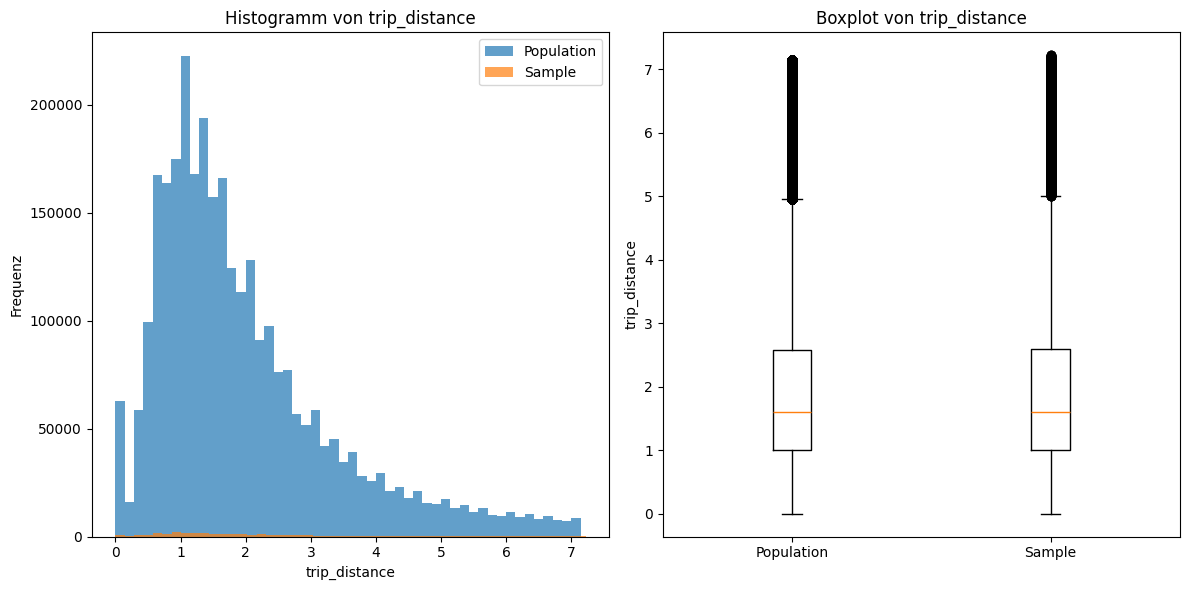

In [25]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Entfernen der Ausreißer aus der gesamten Population und der Stichprobe
filtered_data = remove_outliers(pd.read_parquet(path), 'trip_distance')
filtered_sampled_data = remove_outliers(sampled_data, 'trip_distance')

# Vergleich der Variabilität nach Entfernung der Ausreißer
analyze_variability(data=filtered_data, sampled_data=filtered_sampled_data, column='trip_distance')

Da die Stichprobe die Population gut repräsentiert, sollte sie sowohl für lineare Regression als auch für Random Forest geeignet sein.

<h1>Lieare Regression:</h1>

Korrelationsmatrix:
travel_time                 0.160575
start_month                 0.000759
start_day                  -0.006594
start_hour                  0.025217
weekday                    -0.020122
passenger_count             0.010892
trip_distance               0.085438
PULocationID               -0.068206
DOLocationID               -0.049295
tip_amount                  1.000000
total_amount_without_tip    0.595072
Name: tip_amount, dtype: float64


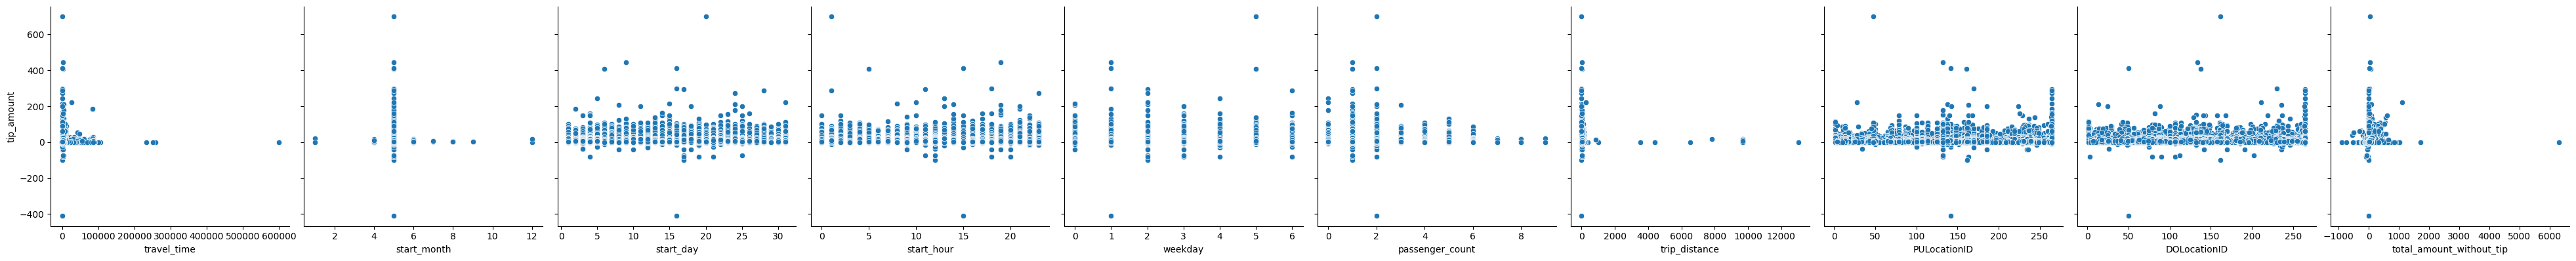

Mean Squared Error: 10.903392561562475
R^2 Score: 0.3688609691015494
Koeffizienten:
                           Coefficient
travel_time               1.275729e-05
start_month               2.762557e-02
start_day                -3.499865e-03
start_hour                1.336273e-02
weekday                  -1.554307e-02
passenger_count          -5.149451e-02
trip_distance             8.172938e-04
PULocationID              8.255915e-07
DOLocationID              1.729262e-04
total_amount_without_tip  1.143047e-01


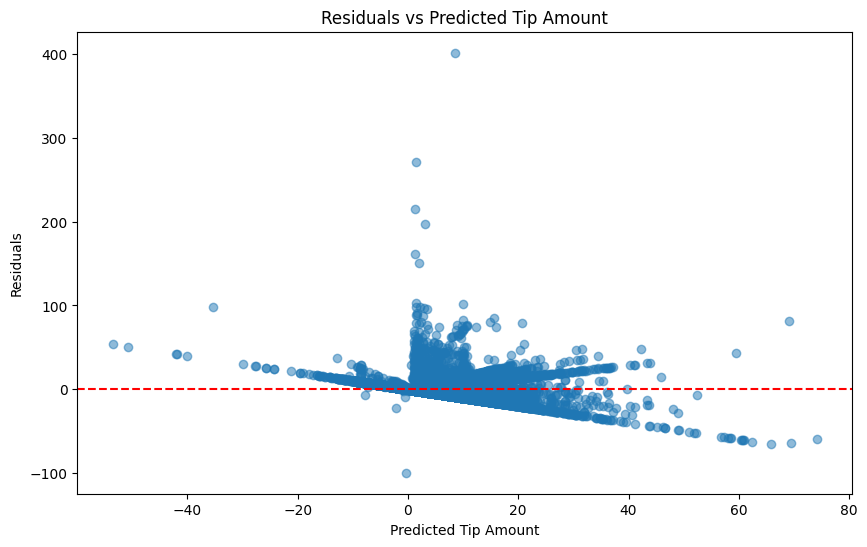

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Daten laden
path = 'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY\\2023\\yellow_tripdata_2023-05.parquet'
data = pd.read_parquet(path)

# Feature-Engineering
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['travel_time'] = (pd.to_datetime(data['tpep_dropoff_datetime']) - data['tpep_pickup_datetime']).dt.total_seconds()
data['start_month'] = data['tpep_pickup_datetime'].dt.month
data['start_day'] = data['tpep_pickup_datetime'].dt.day
data['start_hour'] = data['tpep_pickup_datetime'].dt.hour
data['weekday'] = data['tpep_pickup_datetime'].dt.weekday
data['total_amount_without_tip'] = data['total_amount'] - data['tip_amount']

# Relevante Spalten auswählen
columns = ['travel_time', 'start_month', 'start_day', 'start_hour', 'weekday', 'passenger_count', 
           'trip_distance', 'PULocationID', 'DOLocationID', 'tip_amount', 'total_amount_without_tip']
data = data[columns]

# Entfernen von Zeilen mit fehlenden Werten
data.dropna(inplace=True)

# Korrelation berechnen
correlation_matrix = data.corr()
print("Korrelationsmatrix:")
print(correlation_matrix['tip_amount'])

# Streudiagramme erstellen
sns.pairplot(data, x_vars=['travel_time', 'start_month', 'start_day', 'start_hour', 'weekday', 
                           'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 
                           'total_amount_without_tip'], y_vars='tip_amount', kind='scatter', height=4)
plt.show()

# Lineare Regression
X = data.drop(['tip_amount'], axis=1)
y = data['tip_amount']

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = model.predict(X_test)

# Auswertung des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Koeffizienten und Intercept ausgeben
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Koeffizienten:")
print(coefficients)

# Streudiagramme mit den Residuen
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Tip Amount')
plt.show()
